# 吉布斯采样

对于多元分布, $P(X), X=\left[\begin{array}{l}
x_1 \\
x_2
\end{array}\right]$吉布斯抽样执行如下。假设很难从联合分布中抽样$P\left(x_1, x_2\right)$但是从条件分布$P(x_1|x_2)$和$P(x_2|x_1)$中抽样是可能的。

- 从$X^t=\left[\begin{array}{l}
x_1^0 \\
x_2^0
\end{array}\right]$开始
- 采样$x_1^{t+1} \sim P\left(x_1 \mid x_2^t\right)$
- 采样$x_2^{t+1} \sim P\left(x_2 \mid x_1^{t+1}\right)$
- $X^{t+1}=\left[\begin{array}{l}
x_1^{t+1} \\
x_2^{t+1}
\end{array}\right]$

删除前几个样本作为老化值。       
让                
$P(X)=P\left(x_1, x_2\right)=\frac{1}{\sqrt{|2 \pi \Sigma|}} e^{-\frac{1}{2}(X-\mu)^T \Sigma^{-1}(X-\mu)}$                
其中，$\mu=\left[\begin{array}{l}     
0 \\
0
\end{array}\right]$ 和 $\Sigma=\left[\begin{array}{ll}
1 & b \\
b & 1
\end{array}\right]$和$X=\left[\begin{array}{l}
x_1 \\
x_2
\end{array}\right]$和$b=0.8$              
条件概率由                    
$$
\begin{aligned}
& P\left(x_1 \mid x_2\right)=\mathcal{N}\left(b x_2, 1-b^2\right) \\
& P\left(x_2 \mid x_1\right)=\mathcal{N}\left(b x_1, 1-b^2\right)
\end{aligned}
$$




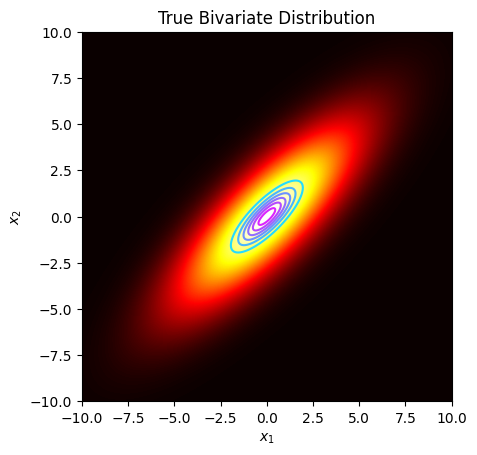

In [5]:
import numpy.linalg as LA
import numpy as np
import matplotlib.pyplot as plt

def multivariate_normal(X, mu=np.array([[0, 0]]), sig=np.array([[1, 0.8], [0.8, 1]])):
    sqrt_det_2pi_sig = np.sqrt(2 * np.pi * LA.det(sig))
    sig_inv = LA.inv(sig)
    X = X[:, None, :] - mu[None, :, :]
    return np.exp(-np.matmul(np.matmul(X, np.expand_dims(sig_inv, 0)), (X.transpose(0, 2, 1)))/2)/sqrt_det_2pi_sig

x = np.linspace(-3, 3, 1000)
X = np.array(np.meshgrid(x, x)).transpose(1, 2, 0)
X = np.reshape(X, [X.shape[0] * X.shape[1], -1])
z = multivariate_normal(X)

plt.imshow(z.squeeze().reshape([x.shape[0], -1]), extent=[-10, 10, -10, 10], cmap='hot', origin='lower')
plt.contour(x, x, z.squeeze().reshape([x.shape[0], -1]), cmap='cool')
plt.title('True Bivariate Distribution')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()


In [6]:
x0 = [0, 0]
xt = x0
b = 0.8
samples = []
for i in range(100000):
    x1_t = np.random.normal(b*xt[1], 1-b*b)
    x2_t = np.random.normal(b*x1_t, 1-b*b)
    xt = [x1_t, x2_t]
    samples.append(xt)
burn_in = 1000
samples = np.array(samples[burn_in:])

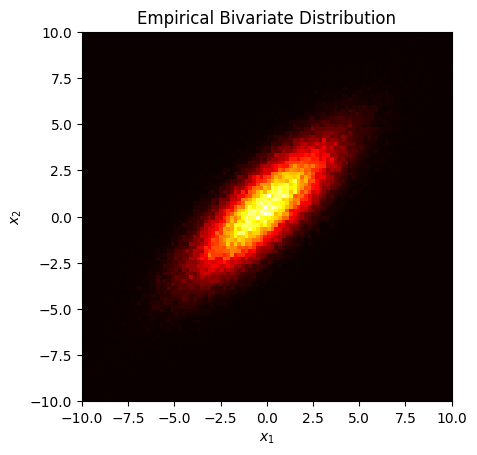

In [7]:
im, x_, y_ = np.histogram2d(samples[:, 0], samples[:, 1], bins=100, normed=True)
plt.imshow(im, extent=[-10, 10, -10, 10], cmap='hot', origin='lower', interpolation='nearest')
plt.title('Empirical Bivariate Distribution')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()